# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,confusion_matrix

import pickle

# Importing Dataset

In [2]:
data = pd.read_csv('MIES_Dev_Data/data.csv', '\t')

In [3]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91E,country,dateload,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
0,5,51,7107,3,91,2522,1,56,6180,2,...,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,2691,BR,2019-02-20 18:10:24,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3697,CZ,2019-02-20 18:16:21,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,1662,CA,2019-02-20 18:21:49,2,325,12,1,1,18,2


In [4]:
for column in data.columns:
    print(column, end = " ")

Q1A Q1I Q1E Q2A Q2I Q2E Q3A Q3I Q3E Q4A Q4I Q4E Q5A Q5I Q5E Q6A Q6I Q6E Q7A Q7I Q7E Q8A Q8I Q8E Q9A Q9I Q9E Q10A Q10I Q10E Q11A Q11I Q11E Q12A Q12I Q12E Q13A Q13I Q13E Q14A Q14I Q14E Q15A Q15I Q15E Q16A Q16I Q16E Q17A Q17I Q17E Q18A Q18I Q18E Q19A Q19I Q19E Q20A Q20I Q20E Q21A Q21I Q21E Q22A Q22I Q22E Q23A Q23I Q23E Q24A Q24I Q24E Q25A Q25I Q25E Q26A Q26I Q26E Q27A Q27I Q27E Q28A Q28I Q28E Q29A Q29I Q29E Q30A Q30I Q30E Q31A Q31I Q31E Q32A Q32I Q32E Q33A Q33I Q33E Q34A Q34I Q34E Q35A Q35I Q35E Q36A Q36I Q36E Q37A Q37I Q37E Q38A Q38I Q38E Q39A Q39I Q39E Q40A Q40I Q40E Q41A Q41I Q41E Q42A Q42I Q42E Q43A Q43I Q43E Q44A Q44I Q44E Q45A Q45I Q45E Q46A Q46I Q46E Q47A Q47I Q47E Q48A Q48I Q48E Q49A Q49I Q49E Q50A Q50I Q50E Q51A Q51I Q51E Q52A Q52I Q52E Q53A Q53I Q53E Q54A Q54I Q54E Q55A Q55I Q55E Q56A Q56I Q56E Q57A Q57I Q57E Q58A Q58I Q58E Q59A Q59I Q59E Q60A Q60I Q60E Q61A Q61I Q61E Q62A Q62I Q62E Q63A Q63I Q63E Q64A Q64I Q64E Q65A Q65I Q65E Q66A Q66I Q66E Q67A Q67I Q67E Q68A Q68I Q68E Q69A Q6

## Dropping features irrelevant for prediction

In [5]:
data.drop([column for column in data.columns if column != "IE" and (column[-1] == 'E' or column[-1] == 'I')],axis=1,inplace=True)

In [6]:
data.drop(['country','dateload','introelapse','testelapse','surveyelapse','engnat','age','gender'],axis = 1, inplace = True)

In [7]:
data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,IE
0,5,3,1,2,3,2,3,3,4,5,...,3,2,1,4,2,5,4,3,3,3
1,5,5,1,5,2,2,5,2,1,3,...,2,2,2,1,3,4,4,4,3,2
2,3,4,5,3,4,5,5,5,5,5,...,5,5,5,4,5,3,2,1,1,1
3,5,2,1,1,5,5,5,4,4,2,...,5,5,5,3,5,4,4,3,3,1
4,1,2,1,1,3,3,5,1,3,4,...,3,1,1,3,1,2,5,5,5,2


In [8]:
print(data.isnull().values.any())

False


### We will not not apply One-Hot-Encoding since the input data is ordinal & not categorical

In [9]:
data['IE'] = data['IE'].apply(lambda x: x % 3)
category = ['Ambivert', 'Introvert', 'Extrovert']
for i in range(3):
    print(category[i] + 's: ', len(data[data['IE'] == i]))

Ambiverts:  1794
Introverts:  4404
Extroverts:  990


#### As there are only 990 extrovert resulting datasets, we will keep around 1000 datasets from each category for the model to create a balance. The rest of the data can be utilized later when we gather more data for extroverts & ambiverts

In [10]:
# separating each category
data_A = data[data['IE'] == 0].copy()
data_I = data[data['IE'] == 1].copy()
data_E = data[data['IE'] == 2].copy()

# Random Shuffle
data_A = data_A.sample(frac = 1).reset_index(drop = True)
data_I = data_I.sample(frac = 1).reset_index(drop = True)
data_E = data_E.sample(frac = 1).reset_index(drop = True)

In [11]:
# Main data & Extra Test data
data_A_M = data_A[:1000].copy()
data_A_ET = data_A[1000:].copy()
data_I_M = data_I[:1000].copy()
data_I_ET = data_I[1000:].copy()
data_E_M = data_E.copy()

In [12]:
# Combining
data_M = pd.concat([data_A_M, data_I_M, data_E_M])
data_M = data_M.sample(frac = 1).reset_index(drop = True)
data_ET = pd.concat([data_A_ET, data_I_ET])
data_ET = data_ET.sample(frac = 1).reset_index(drop = True)

# Train-Test-Split

In [13]:
X = data_M.drop(['IE'],axis = 1)
Y = data_M['IE']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 511)

# 1) KNN

In [15]:
error_rate = []

# Trying for each K from 1 to 50
for k in range(1,51):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

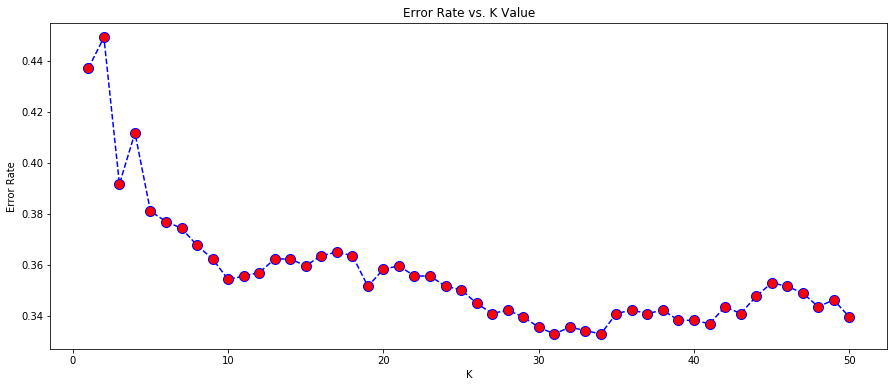

In [16]:
plt.figure(figsize=(15,6))
plt.plot(range(1,51), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### As the curve stablizes around 40, let us take it as the K value

In [17]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

## Evaluation

In [18]:
print(confusion_matrix(Y_test, prediction))

[[ 97  65  76]
 [ 45 203  10]
 [ 49   8 195]]


In [19]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.51      0.41      0.45       238
           1       0.74      0.79      0.76       258
           2       0.69      0.77      0.73       252

    accuracy                           0.66       748
   macro avg       0.65      0.66      0.65       748
weighted avg       0.65      0.66      0.65       748



# 2) Random Forests

In [20]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, Y_train)
prediction = rfc.predict(X_test)

## Evaluation

In [21]:
print(confusion_matrix(Y_test, prediction))

[[128  53  57]
 [ 59 192   7]
 [ 58   6 188]]


In [22]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       238
           1       0.76      0.74      0.75       258
           2       0.75      0.75      0.75       252

    accuracy                           0.68       748
   macro avg       0.68      0.68      0.68       748
weighted avg       0.68      0.68      0.68       748



# 3) SVM

In [23]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.341, total=   0.6s
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.341, total=   0.6s
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.339, total=   0.6s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.339, total=   0.5s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.339, total=   0.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.341, total=   0.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.341, total=   0.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.339, total=   0.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.339, total=   0.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] .

[CV] ........... C=1, gamma=10, kernel=rbf, score=0.341, total=   0.5s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.341, total=   0.5s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.339, total=   0.5s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.339, total=   0.5s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.339, total=   0.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.341, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.341, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.685, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.672, total=   0.4s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.341, total=   0.6s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.341, total=   0.6s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.339, total=   0.6s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.339, total=   0.6s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.339, total=   0.6s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.697, total=   0.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.647, total=   0.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.670, total=   0.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.665, total=   0.7s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [25]:
model = SVC(C = 1, gamma = 0.01)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

## Evaluation

In [26]:
print(confusion_matrix(Y_test, prediction))

[[132  51  55]
 [ 67 187   4]
 [ 64   4 184]]


In [27]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.50      0.55      0.53       238
           1       0.77      0.72      0.75       258
           2       0.76      0.73      0.74       252

    accuracy                           0.67       748
   macro avg       0.68      0.67      0.67       748
weighted avg       0.68      0.67      0.68       748



### Notice the fact that most of the inaccuracy occurs only when prediction involves factors of ambiverts, which is completely normal

### Since SVM has the highest accuracy & is a stable model, we choose it

# Final Training & Export of Model

In [28]:
model = SVC(C = 1, gamma = 0.01)
model.fit(X, Y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
with open("model.pkl", 'wb') as file:
    pickle.dump(model, file)